# Debugging bench

In [41]:
!make

make: Nothing to be done for 'all'.


In [55]:
import os
import sys
import numpy as np
sys.path.insert(0, os.path.abspath("../include"))
import subprocess
import json
import py_helper

%matplotlib widget

defines=py_helper.load_defines("mat_size.hpp")

NCOLS_A = defines["NCOLS_A"]
NROWS_C = defines["NROWS_C"]
NCOLS_C = defines["NCOLS_C"]

# A is of size (NROWS_C, NCOLS_A)
# B is of size (NCOLS_A, NCOLS_C)    
# C is of size (NROWS_C, NCOLS_C)

mat_mul_double=py_helper.MatMul(NCOLS_A, NROWS_C, NCOLS_C, np.float64)
mat_mul_float=py_helper.MatMul(NCOLS_A, NROWS_C, NCOLS_C, np.float32)

# Make up objects for timing results and local optimisation
timings=py_helper.TimingResults()

	               name: AMD Ryzen 7 6800H with Radeon Graphics          
	 global memory size: 32877 MB
	    max buffer size: 16438 MB
	     max local size: (8192,8192,8192)
	     max work-items: 8192
Cache line size is 64 bytes
Time for kernel was 9.132 ms
Maximum error (infinity norm) is: 0.000427246


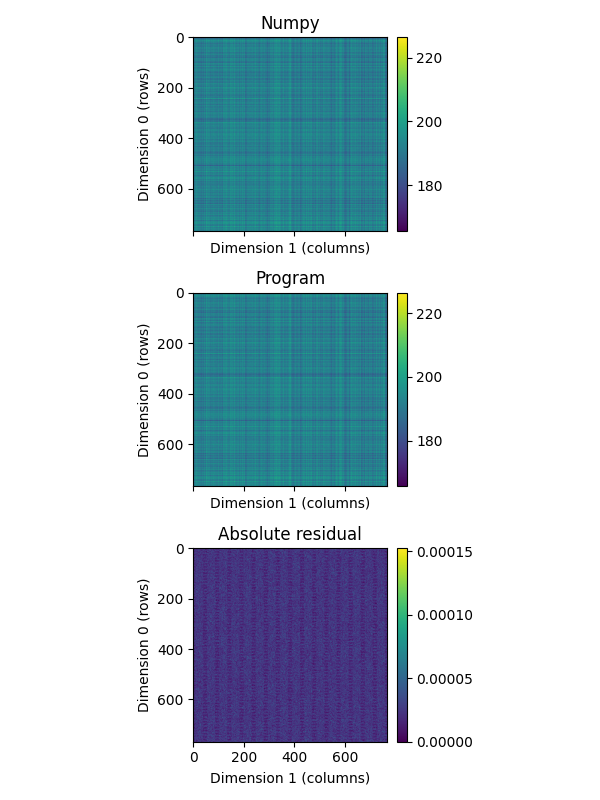

In [64]:
#local_opt=py_helper.LocalOpt(cmds=["./mat_mult_local_A.exe", "-cpu", "0"])
subprocess.run(["./mat_mult_tile_local_AB_vector.exe", "-cpu", "0"])

mat_mul_float.load_data()
mat_mul_float.check_data()